# Final Project - Digital Twin - Simulation of Millie 

# Names

- Antony Liao
- Yuheng Ma
- Yanguang Zhou
- Yuyao Wang
- Shihan Qian

# Abstract 
Our goal is to ...

# Background

digital twin ...

# Data

The group makes observation on Millie's operation situation during one week (11.8-11.15) on different times of the day (covering morning, noon and afternoon)	

# Setup and Data Cleaning

In [1]:
# Imports
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import os
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the one week millie's data
df = pd.read_excel('Data_Millie.xlsx')
df

,Day,Day of the week,Time slot,Order Number,Menu Items,Number of the Item
0,2023-11-09,Thursday,8am-9am,1,Hot Latte,1
1,2023-11-09,Thursday,8am-9am,2,Panini,1
2,2023-11-09,Thursday,8am-9am,3,Hot Latte,1
3,2023-11-09,Thursday,8am-9am,4,Hot Latte,1
4,2023-11-09,Thursday,8am-9am,5,Hot Chocolate,1
...,...,...,...,...,...,...
3837,2023-11-15,Wednesday,7pm-8pm,583,Packaged product,1
3838,2023-11-15,Wednesday,7pm-8pm,584,Hot Latte,1
3839,2023-11-15,Wednesday,7pm-8pm,585,Pre-baked goods,1
3840,2023-11-15,Wednesday,7pm-8pm,586,Affogato,1


## Table 1 - number of each item
Description: Table 1 shows the number of each item ordered in one-hour time slot each day

In [3]:
Table_1 = df.groupby(['Day of the week','Time slot','Menu Items'],as_index = False)['Number of the Item'].sum()
Table_1

,Day of the week,Time slot,Menu Items,Number of the Item
0,Friday,10am-11am,Cappucino,2
1,Friday,10am-11am,Coffee,5
2,Friday,10am-11am,Hot Americano,1
3,Friday,10am-11am,Hot Latte,8
4,Friday,10am-11am,Ice Cream,6
...,...,...,...,...
959,Wednesday,9am-10am,Iced Tea,1
960,Wednesday,9am-10am,Mocha,1
961,Wednesday,9am-10am,Packaged product,6
962,Wednesday,9am-10am,Panini,5


In [4]:
# If you want to output to an excel
# Table_1.to_excel("output.xlsx",sheet_name='Number of each item')  

## Table 2 - number of employees needed
Description: Table 2 shows the number of employees needed in each hour per day

In [5]:
df_pt = pd.read_excel('Process_time.xlsx')
df_pt

,Item name,process time
0,Iced Latte,1.7
1,Hot Latte,1.5
2,Ice cream,0.7
3,Iced Americano,1.2
4,Hot Americano,1.0
5,Pre-baked goods,0.2
6,Cappucino,2.0
7,Hot Chocolate,1.5
8,Panini,3.0
9,Mocha,2.0


In [6]:
merged = pd.merge(df,df_pt, left_on = 'Menu Items', right_on = 'Item name', how = 'inner')
Table_2= merged.groupby(['Day of the week','Time slot'],as_index = False)['process time'].sum()

In [7]:
Table_2['number_of_employees'] = (Table_2['process time']/60)//1+1
Table_2

,Day of the week,Time slot,process time,number_of_employees
0,Friday,10am-11am,52.3,1.0
1,Friday,11am-12pm,57.8,1.0
2,Friday,12pm-1pm,74.7,2.0
3,Friday,1pm-2pm,61.7,2.0
4,Friday,2pm-3pm,55.7,1.0
...,...,...,...,...
69,Wednesday,5pm-6pm,51.9,1.0
70,Wednesday,6pm-7pm,76.8,2.0
71,Wednesday,7pm-8pm,69.8,2.0
72,Wednesday,8am-9am,39.8,1.0


In [8]:
#If you want to output to an excel
#Table_2.to_excel("output.xlsx",sheet_name='Number of employees needed')  

## Table_3 - Raw Material Cost
Description: Table 3 shows the raw material cost in each hour per day

In [9]:
df_rm = pd.read_excel('Millie _rawitem.xlsx')
df_rm

,Menu Items,Required raw material of each of the menu items,Cost,Price
0,Iced Latte,"Espresso, Steamed Milk",1.4,4.25
1,Hot Latte,"Espresso, Steamed Milk",1.4,4.25
2,Ice cream,Manufactured Ice Cream,2.0,5.00
3,Iced Americano,"Coffee Beans, Water, Cream",0.6,3.50
4,Hot Americano,"Coffee Beans, Water, Cream",0.6,3.50
5,Pre-baked goods,Pre-baked goods,2.5,7.50
6,Cappucino,"Espresso, Steamed Milk",1.4,3.75
7,Hot Chocolate,Chocolate Milk,0.8,4.50
8,Panini,"Chicken, roasted veggie, bread",3.0,8.00
9,Mocha,"Espresso, Steamed Milk, Syrups",1.6,5.00


In [10]:
merged_1 = pd.merge(df,df_rm, left_on = 'Menu Items', right_on = 'Menu Items', how = 'inner')
Table_3= merged_1.groupby(['Day of the week','Time slot'],as_index = False)['Cost'].sum()
Table_3

,Day of the week,Time slot,Cost
0,Friday,10am-11am,59.2
1,Friday,11am-12pm,57.6
2,Friday,12pm-1pm,74.5
3,Friday,1pm-2pm,66.2
4,Friday,2pm-3pm,63.7
...,...,...,...
69,Wednesday,5pm-6pm,63.6
70,Wednesday,6pm-7pm,87.9
71,Wednesday,7pm-8pm,88.2
72,Wednesday,8am-9am,50.0


## Table 4 - Profit Margin
Description: Table 4 shows the total profit of millie shop each day

In [11]:
df_rm['Profit'] = df_rm['Price'] - df_rm['Cost']

In [12]:
merged_2 = pd.merge(df,df_rm, left_on = 'Menu Items', right_on = 'Menu Items', how = 'inner')
Table_5= merged_2.groupby(['Day of the week'],as_index = False)['Profit'].sum()
Table_5

,Day of the week,Profit
0,Friday,1311.70
1,Monday,1996.60
2,Saturday,1008.80
3,Sunday,1320.75
4,Thursday,2076.35
5,Tuesday,2104.30
6,Wednesday,2113.00


Text(0.5, 0, 'Day')

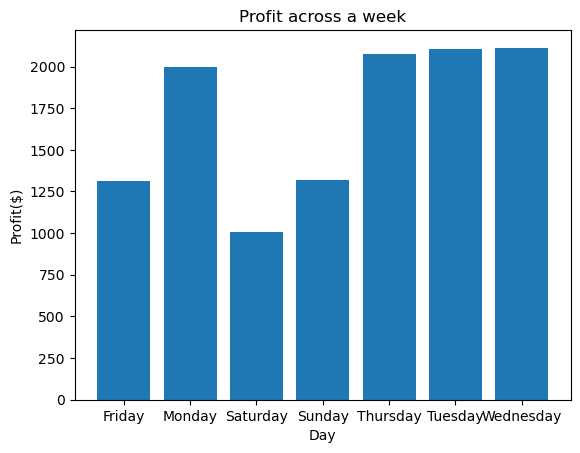

In [13]:
plt.bar(Table_5['Day of the week'], Table_5['Profit'])
plt.title('Profit across a week')
plt.ylabel('Profit($)')
plt.xlabel('Day')

## Data Manipulation: add new Item to the data

In [14]:
df_new_item_added = df.drop('Order Number', axis=1)


In [15]:
#Set number of customers decide to buy new item instead of old one and create a random list to replace the old item
num_replace_item = int(input("Enter the number of replaced items: "))
rand_1 = []
for i in range(num_replace_item):
    rand_1.append(random.randint(0, 3000))

In [16]:
#Enter the new item name and update 
# New_Item = 'Boba Milktea'
New_Item = input("Enter the new item name: ")
df_new_item_added.loc[rand_1,'Menu Items'] = New_Item

,Day,Day of the week,Time slot,Menu Items,Number of the Item
0,2023-11-09,Thursday,8am-9am,Hot Latte,1
1,2023-11-09,Thursday,8am-9am,Panini,1
2,2023-11-09,Thursday,8am-9am,Hot Latte,1
3,2023-11-09,Thursday,8am-9am,Hot Latte,1
4,2023-11-09,Thursday,8am-9am,Hot Chocolate,1
5,2023-11-09,Thursday,8am-9am,Boba Milktea,1
6,2023-11-09,Thursday,8am-9am,Packaged product,1
7,2023-11-09,Thursday,8am-9am,Hot Latte,1
8,2023-11-09,Thursday,8am-9am,Coffee,1
9,2023-11-09,Thursday,8am-9am,Coffee,1


In [ ]:
#Check if new items are added into the table
df_new_item_added.loc[df_new_item_added['Menu Items'] == New_Item]

In [17]:
#Set numbers of customers buying new items and add to the existing table
num_new_item = int(input("Enter the number of new items added: "))
df_new_item_added.loc[1,'Menu Items'] = New_Item
df_new_item_added = pd.concat([df_new_item_added, df_new_item_added.loc[[1] * num_new_item].assign(**{'Menu Items': New_Item})])
df_new_item_added.tail()

,Day,Day of the week,Time slot,Menu Items,Number of the Item
1,2023-11-09,Thursday,8am-9am,Boba Milktea,1
1,2023-11-09,Thursday,8am-9am,Boba Milktea,1
1,2023-11-09,Thursday,8am-9am,Boba Milktea,1
1,2023-11-09,Thursday,8am-9am,Boba Milktea,1
1,2023-11-09,Thursday,8am-9am,Boba Milktea,1


In [18]:
#Updated process time sheet
process_time = float(input("Enter the new item process time: "))
new_item_process = {'Item name': New_Item, 'process time': process_time}
df_pt.loc[len(df_pt)] = new_item_process
df_pt.tail()

,Item name,process time
13,Milkshake,3.0
14,Hot Tea,1.0
15,Iced Tea,1.2
16,Espresso,0.5
17,Boba Milktea,1.5


In [19]:
#Update row material of new item
new_cost = float(input("Enter the new item cost: "))
new_price = float(input("Enter the new item price: "))
new_profit = new_price-new_cost
new_item_raw_material = {'Menu Items': New_Item, 'Required raw material of each of the menu items': 'Milk, Tea Bag, Boba','Cost':new_cost,'Price':new_price,'Profit':new_profit}
df_rm.loc[len(df_rm)] = new_item_raw_material
df_rm.tail()

,Menu Items,Required raw material of each of the menu items,Cost,Price,Profit
13,Milkshake,"Ice Cream, Milk",1.1,8.00,6.90
14,Hot Tea,"Tea Bag, Hot Water",0.8,4.25,3.45
15,Iced Tea,"Tea Bag, Ice",0.8,4.25,3.45
16,Espresso,"Coffee Beans, Hot Water",0.5,3.00,2.50
17,Boba Milktea,"Milk, Tea Bag, Boba",1.5,5.00,3.50


## Manipulate Labor Efficiency 

In [21]:
#Update Table 2, number of employees needed, with different labor efficiency
labor_efficiency = float(input("Enter the labor efficiency (between 0 to 1): "))
Table_2['number_of_employees'] = (Table_2['process time']/(60*labor_efficiency))//1+1
Table_2

## Manipulate the Total Sale

In [29]:
#Modify the sale
increase_sale = int(input("Enter the magnitude for increasing the sale (integer only)"))
df_drop = df.drop('Order Number', axis=1)
df_increase_sale = pd.DataFrame(np.repeat(df_drop.values, increase_sale, axis=0))
df_increase_sale.columns = df_drop.columns
df_increase_sale

,Day,Day of the week,Time slot,Menu Items,Number of the Item
0,2023-11-09,Thursday,8am-9am,Hot Latte,1
1,2023-11-09,Thursday,8am-9am,Hot Latte,1
2,2023-11-09,Thursday,8am-9am,Panini,1
3,2023-11-09,Thursday,8am-9am,Panini,1
4,2023-11-09,Thursday,8am-9am,Hot Latte,1
...,...,...,...,...,...
7679,2023-11-15,Wednesday,7pm-8pm,Pre-baked goods,1
7680,2023-11-15,Wednesday,7pm-8pm,Affogato,1
7681,2023-11-15,Wednesday,7pm-8pm,Affogato,1
7682,2023-11-15,Wednesday,7pm-8pm,Milkshake,1


In [30]:
#Update Employee Table
labor_efficiency = float(input("Enter the labor efficiency (between 0 to 1): "))
merged_increase = pd.merge(df_increase_sale,df_pt, left_on = 'Menu Items', right_on = 'Item name', how = 'inner')
Table_2_increase= merged_increase.groupby(['Day of the week','Time slot'],as_index = False)['process time'].sum()
Table_2_increase['number_of_employees'] = (Table_2_increase['process time']/(60*labor_efficiency))//1+1
Table_2_increase

,Day of the week,Time slot,process time,number_of_employees
0,Friday,10am-11am,104.6,2.0
1,Friday,11am-12pm,115.6,2.0
2,Friday,12pm-1pm,149.4,3.0
3,Friday,1pm-2pm,123.4,3.0
4,Friday,2pm-3pm,111.4,2.0
...,...,...,...,...
69,Wednesday,5pm-6pm,103.8,2.0
70,Wednesday,6pm-7pm,153.6,3.0
71,Wednesday,7pm-8pm,139.6,3.0
72,Wednesday,8am-9am,79.6,2.0


In [33]:
#Update cost table
merged_cost = pd.merge(df_increase_sale,df_rm, left_on = 'Menu Items', right_on = 'Menu Items', how = 'inner')
Table_3= merged_cost.groupby(['Day of the week','Time slot'],as_index = False)['Cost'].sum()
Table_3

,Day of the week,Time slot,Cost
0,Friday,10am-11am,118.4
1,Friday,11am-12pm,115.2
2,Friday,12pm-1pm,149.0
3,Friday,1pm-2pm,132.4
4,Friday,2pm-3pm,127.4
...,...,...,...
69,Wednesday,5pm-6pm,127.2
70,Wednesday,6pm-7pm,175.8
71,Wednesday,7pm-8pm,176.4
72,Wednesday,8am-9am,100.0
